In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from pathlib import Path
import matplotlib.pyplot as plt
import skimage as sk
import skimage.io as io
import numpy as np
import homography, rectification, my_types, utils

In [13]:
DATA = Path("data")

In [14]:
PICK_NEW = False
im1_name = DATA / "doll1.jpg"
im2_name = DATA / "doll2.jpg"
im3_name = DATA / "doll3.jpg"

if PICK_NEW:
    %matplotlib tk
    im1_pts = utils.pick_points(im1_name, 8)
    im2_pts = utils.pick_points(im2_name, 8)
    # im3_pts = utils.pick_points(im3_name, 8)
    utils.save_points(im1_pts, im1_name)
    utils.save_points(im2_pts, im2_name)
    # utils.save_points(im3_pts, im3_name)
else:
    %matplotlib inline
    im1_pts = utils.load_points(im1_name)
    im2_pts = utils.load_points(im2_name)
    # im3_pts = utils.load_points(im3_name)

In [15]:
im1 = my_types.to_img_arr(im1_name)
im2 = my_types.to_img_arr(im2_name)
im3 = my_types.to_img_arr(im3_name)

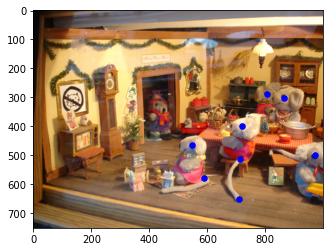

In [16]:
utils.plot_pts(im1, im1_pts)

In [18]:
import cv2

T, *_ = cv2.findHomography(im1_pts, im2_pts, cv2.RANSAC, 5.0)
T = np.array(T)
print(T)

[[ 1.69109039e+00 -1.08162125e-01 -7.81765127e+02]
 [ 1.92766975e-01  1.42730359e+00 -1.57550062e+02]
 [ 7.35681482e-04 -6.74767945e-05  1.00000000e+00]]


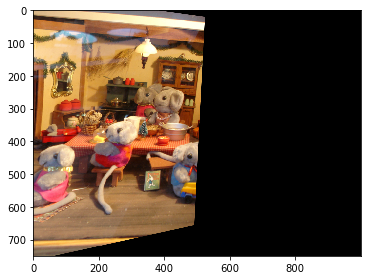

In [22]:
warp1 = sk.transform.warp(im1, np.linalg.inv(T))
io.imshow(warp1)